In [1]:
import numpy as np
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
import matplotlib.pyplot as mlpt
import tweepy
import csv
import random

In [2]:
cdata = pd.read_csv('output (1).csv')

In [3]:
cdata

,created_at,text
0,Wed Jan 01 03:59:03 +0000 2014,RT @philstockworld: Summary of Yesterday's Web...
1,Wed Jan 01 03:29:29 +0000 2014,RT @philstockworld: Summary of Yesterday's Web...
2,Wed Jan 01 18:08:47 +0000 2014,iTV Will Boost Apple http://t.co/8dup4cQc08 $A...
3,Wed Jan 01 01:52:31 +0000 2014,#iPhone users are more intelligent than #Samsu...
4,Wed Jan 01 01:18:36 +0000 2014,RT @philstockworld: Summary of Yesterday's Web...
...,...,...
20663,Sat Jan 11 05:12:03 +0000 2014,$AAPL Apple to open new store in Brisbane CBD ...
20664,Sun Jan 12 14:12:07 +0000 2014,$AAPL What's Behind The Swift Rise In Apple St...
20665,Sun Jan 12 17:50:32 +0000 2014,RT @SupremeSees: $OXBT Monday Gapper? http://t...
20666,Sun Jan 12 14:22:58 +0000 2014,Apple Inc. (AAPL): What's Behind The Swift Ris...


In [4]:
from datetime import datetime
count=0
for dates in cdata['created_at'] :
    dates = datetime.strftime(datetime.strptime(dates,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d')
    cdata.at[count,'created_at']=dates
    count=count+1



In [5]:
cdata

,created_at,text
0,2014-01-01,RT @philstockworld: Summary of Yesterday's Web...
1,2014-01-01,RT @philstockworld: Summary of Yesterday's Web...
2,2014-01-01,iTV Will Boost Apple http://t.co/8dup4cQc08 $A...
3,2014-01-01,#iPhone users are more intelligent than #Samsu...
4,2014-01-01,RT @philstockworld: Summary of Yesterday's Web...
...,...,...
20663,2014-01-11,$AAPL Apple to open new store in Brisbane CBD ...
20664,2014-01-12,$AAPL What's Behind The Swift Rise In Apple St...
20665,2014-01-12,RT @SupremeSees: $OXBT Monday Gapper? http://t...
20666,2014-01-12,Apple Inc. (AAPL): What's Behind The Swift Ris...


In [6]:
cdata = cdata.drop_duplicates(ignore_index=True)
cdata.columns = ['Date','Tweets']
cdata

,Date,Tweets
0,2014-01-01,RT @philstockworld: Summary of Yesterday's Web...
1,2014-01-01,iTV Will Boost Apple http://t.co/8dup4cQc08 $A...
2,2014-01-01,#iPhone users are more intelligent than #Samsu...
3,2014-01-01,2013 Wrap-Up And Trading Set Review - Part III...
4,2014-01-01,Apple Screwed Up Big Time http://t.co/Q2Pzk2VO...
...,...,...
17645,2014-01-11,$AAPL Apple to open new store in Brisbane CBD ...
17646,2014-01-12,$AAPL What's Behind The Swift Rise In Apple St...
17647,2014-01-12,RT @SupremeSees: $OXBT Monday Gapper? http://t...
17648,2014-01-12,Apple Inc. (AAPL): What's Behind The Swift Ris...


In [7]:
    cdata = cdata.sort_values(by='Date' , ignore_index=True)
    cdata
    from bs4 import BeautifulSoup

In [8]:
def handle_emojis(tweet):
    # Smile -- :), : ), :-), (:, ( :, (-:, :'),:D, : D, =)
    tweet = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))|:\s?D | =\)', '', tweet)
    # Sad -- :-(, : (, :(, ):, )-: , :p
    tweet = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)|:p', '', tweet)
    return tweet

In [9]:
index=0
for index,row in cdata.iterrows():
    stre=row["Tweets"]
    # my_new_string=clean(stre)
    my_new_string = re.sub('[^ a-zA-Z0-9]', '', stre)
    # my_new_string=my_new_string.lower().split()
    cdata.sort_index()
    cdata.at[index,'Date']=row["Date"]
    cdata.at[index,'Tweets']=my_new_string
    index=index+1

In [10]:
cdata

,Date,Tweets
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE
3,2014-01-01,iPhone users are more intelligent than Samsung...
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...
...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...
17646,2016-03-31,Apple now collecting some ResearchKit data fro...
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...
17648,2016-03-31,RT businessinsider This guy found a hidden way...


In [11]:
read_stock_p = pd.read_csv('AAPL.csv')

In [12]:
read_stock_p

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,19.791786,20.045713,19.785713,20.036428,17.849323,223084400
1,2014-01-02,19.845715,19.893929,19.715000,19.754642,17.598297,234684800
2,2014-01-03,19.745001,19.775000,19.301071,19.320715,17.211735,392467600
3,2014-01-06,19.194643,19.528570,19.057142,19.426071,17.305593,412610800
4,2014-01-07,19.440001,19.498571,19.211430,19.287144,17.181829,317209200
...,...,...,...,...,...,...,...
560,2016-03-23,26.620001,26.767500,26.475000,26.532499,24.678110,102814000
561,2016-03-24,26.367500,26.562500,26.222500,26.417500,24.571148,104532000
562,2016-03-28,26.500000,26.547501,26.264999,26.297501,24.459534,77645600
563,2016-03-29,26.222500,26.947500,26.219999,26.920000,25.038527,124760400


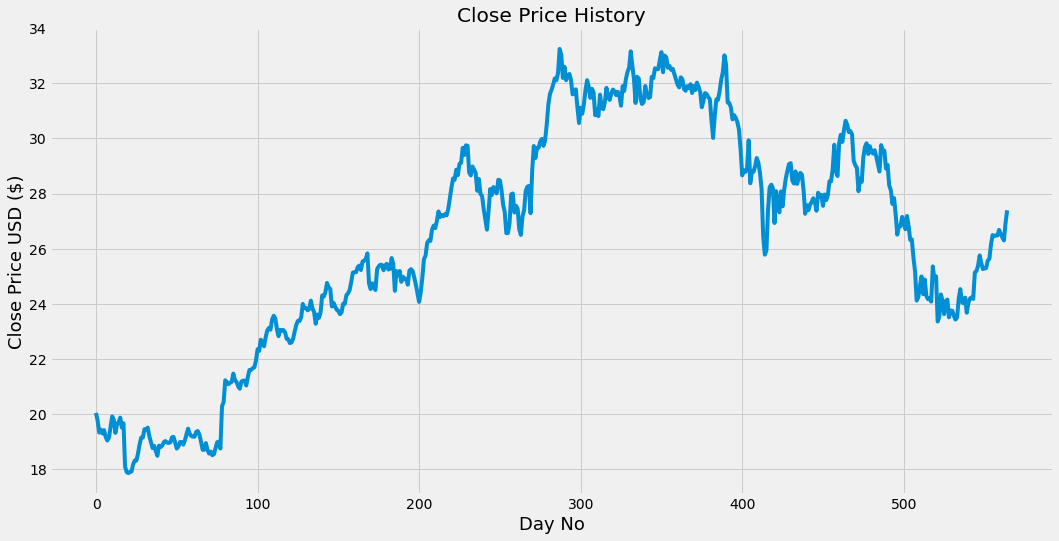

In [13]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(read_stock_p['Close'])
plt.xlabel('Day No', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [14]:
cdata['Prices']=""
cdata

,Date,Tweets,Prices
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,
3,2014-01-01,iPhone users are more intelligent than Samsung...,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,
...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,
17648,2016-03-31,RT businessinsider This guy found a hidden way...,


In [16]:
ccdata = cdata
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.Date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.at[i,'Prices'] = read_stock_p.Close[j]
            break

In [23]:
ccdata

,Date,Tweets,Prices
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.036428
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,
3,2014-01-01,iPhone users are more intelligent than Samsung...,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,
...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27


In [24]:
# ccdata.to_csv('ccdata.csv') 

In [25]:
# mean=0
# summ=0
# count=0
# for i in range(0,len(ccdata)):
#     if(ccdata.Prices.iloc[i]!=""):
#         summ=summ+int(ccdata.Prices.iloc[i])
#         count=count+1
# mean=summ/count
# for i in range(0,len(ccdata)):
#     if(ccdata.Prices.iloc[i]==""):
#         ccdata.Prices.iloc[i]=int(mean)

In [34]:
def getnext(i):
    flg=0
    for j in range(i+1,len(ccdata)):
        if ccdata.Prices.iloc[j]=="":
            continue
        else:
            nxt = ccdata.Prices.iloc[j]
            flg=1
            index=j
            break
    if flg==0:
        return -1,index
    else:
        return nxt,index
  






In [35]:
prev=ccdata.Prices.iloc[0]
i=0
while i<17628:
  # print(i)
  if ccdata.Prices.iloc[i]!="":
    prev=ccdata.Prices.iloc[i]
    i+=1
  else:
    if i==len(ccdata)-1:
      break
    nextt,index=getnext(i)
    if nextt==-1:
       for k in range(i,index):
          ccdata.Prices.iloc[k]=prev
       break
    else:
      


      for k in range(i,index):
        ccdata.Prices.iloc[k]=(prev+nextt)/2
      i=index
for i in range(17630,len(ccdata)):
   ccdata.Prices.iloc[i]=27
      


/home/ayush/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [36]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.036428,,,,
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,NaN,,,,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,NaN,,,,
3,2014-01-01,iPhone users are more intelligent than Samsung...,NaN,,,,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,NaN,,,,
...,...,...,...,...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27.000000,,,,
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27.000000,,,,
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27.000000,,,,
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27.000000,,,,


In [32]:
# ccdata.to_csv('ccdata.csv')
ccdata['Prices'] = pd.to_numeric(ccdata['Prices'], errors='coerce')

In [33]:
ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.036428,,,,
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,NaN,,,,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,NaN,,,,
3,2014-01-01,iPhone users are more intelligent than Samsung...,NaN,,,,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,NaN,,,,
...,...,...,...,...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27.000000,,,,
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27.000000,,,,
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27.000000,,,,
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27.000000,,,,


In [24]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ayush/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'Tweets'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.at[indexx, 'Comp']  = sentence_sentiment['compound']
        ccdata.at[indexx, 'Negative'] = sentence_sentiment['neg']
        ccdata.at[indexx, 'Neutral'] = sentence_sentiment['neu']
        ccdata.at[indexx, 'Positive'] = sentence_sentiment['pos']
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)

In [26]:
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.0,0.0000,0.0,1.000,0.000
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,19.5,0.0000,0.0,1.000,0.000
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,19.5,0.4019,0.0,0.690,0.310
3,2014-01-01,iPhone users are more intelligent than Samsung...,19.5,0.5095,0.0,0.798,0.202
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,19.5,0.0000,0.0,1.000,0.000
...,...,...,...,...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27.0,0.6369,0.0,0.741,0.259
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27.0,0.0000,0.0,1.000,0.000
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27.0,0.0000,0.0,1.000,0.000
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27.0,0.4767,0.0,0.860,0.140


In [27]:
ccdata['target']=""
ccdata

,Date,Tweets,Prices,Comp,Negative,Neutral,Positive,target
0,2013-12-31,RT philstockworld Summary of Yesterdays Webcas...,20.0,0.0000,0.0,1.000,0.000,
1,2014-01-01,RT philstockworld Summary of Yesterdays Webcas...,19.5,0.0000,0.0,1.000,0.000,
2,2014-01-01,iTV Will Boost Apple httptco8dup4cQc08 AAPL APPLE,19.5,0.4019,0.0,0.690,0.310,
3,2014-01-01,iPhone users are more intelligent than Samsung...,19.5,0.5095,0.0,0.798,0.202,
4,2014-01-01,2013 WrapUp And Trading Set Review Part III h...,19.5,0.0000,0.0,1.000,0.000,
...,...,...,...,...,...,...,...,...
17645,2016-03-31,REVIEW This is Apples best iPad AAPL httpstcoL...,27.0,0.6369,0.0,0.741,0.259,
17646,2016-03-31,Apple now collecting some ResearchKit data fro...,27.0,0.0000,0.0,1.000,0.000,
17647,2016-03-31,AAPL Just got this email from AppleWhy Apples ...,27.0,0.0000,0.0,1.000,0.000,
17648,2016-03-31,RT businessinsider This guy found a hidden way...,27.0,0.4767,0.0,0.860,0.140,


<ipython-input-28-bf93936ef057>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdata.target[i]=1
<ipython-input-28-bf93936ef057>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdata.target[i]=2
<ipython-input-28-bf93936ef057>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccdata.target[i]=0


% of positive tweets=  35.51841359773371
% of negative tweets=  16.073654390934845
% of neutral tweets=  48.40793201133145


[]

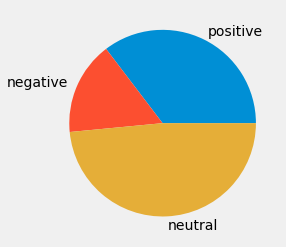

In [28]:
posi=0
nega=0
neut=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
        ccdata.target[i]=0
    if(float(get_val>(0))):
        posi=posi+1
        ccdata.target[i]=2
    if(float(get_val==0)) :
        neut=neut+1
        ccdata.target[i]=1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
neutra=(neut/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
print("% of neutral tweets= ",neutra)
arr=np.asarray([posper,negper,neutra], dtype=int)
mlpt.pie(arr,labels=['positive','negative','neutral'])
mlpt.plot()

In [29]:
ccdata
from wordcloud import WordCloud

             Date                                             Tweets  Prices  \
5      2014-01-01  Apple Screwed Up Big Time httptcoQ2Pzk2VOMm AM...    19.5   
18     2014-01-02  AAPL video Apple Denies Working With NSA and M...    19.0   
22     2014-01-02  AAPL US STOCKSWall St kicks off New Year on lo...    19.0   
27     2014-01-02  DrPaulyDeSantis AAPL having breathing difficul...    19.0   
30     2014-01-02  AAPL  Wall St kicks off New Year on lower note...    19.0   
...           ...                                                ...     ...   
17599  2016-03-29  RT andreascseh Huawei P9 kills the iPhone7 iPh...    26.0   
17605  2016-03-30  RT andreascseh NaziOffizier Otto Skorzeny is M...    27.0   
17619  2016-03-30  US Active Stock Wars AAPL 14 TSLA 079 WMT 116 ...    27.0   
17620  2016-03-30  Sold AAPL CSV FL FLXS HCP KSU LMT MNTX OHI PII...    27.0   
17633  2016-03-31  betting on AAPL hitting 105 maybe even lower b...    27.0   

         Comp Negative Neutral Positive

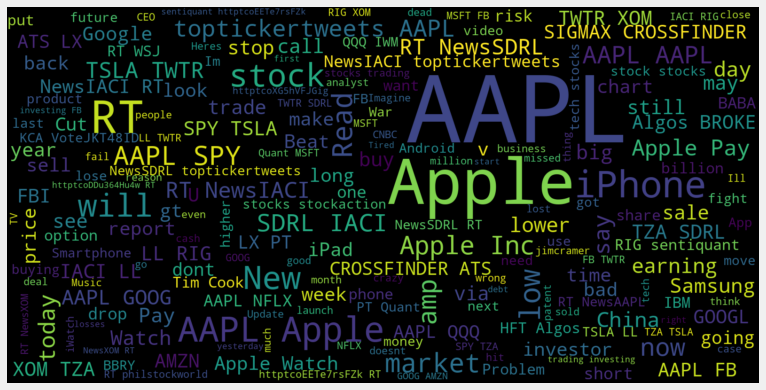

In [30]:
neg_tweets = ccdata[ccdata.target == 0]
neg_string = []
print(neg_tweets)
for t in neg_tweets.Tweets:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


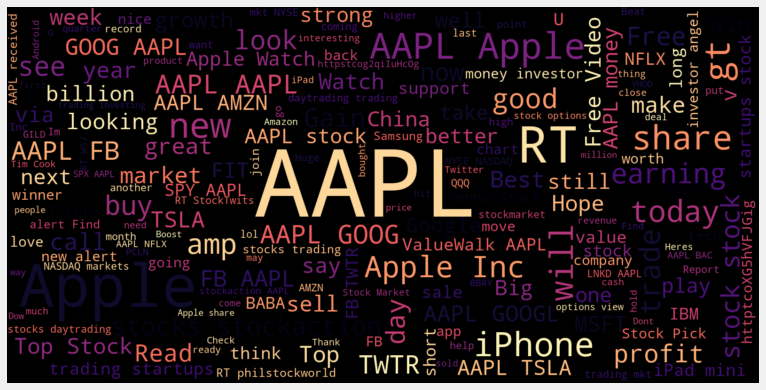

In [31]:
pos_tweets = ccdata[ccdata.target == 2]
pos_string = []
for t in pos_tweets.Tweets:
    pos_string.append(t)
    
pos_string = pd.Series(pos_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [32]:
df = pd.DataFrame(columns = ['Date', 'Positive','Negative','Neutral','Price'])
df 

,Date,Positive,Negative,Neutral,Price


In [33]:
p=0
i=0
flg=0
while i<len(ccdata):
  d1=ccdata.Date[i]
  pi=ccdata.Prices[i]
  p=0
  n=0
  ni=0
  for j in range(i,len(ccdata)):
    if ccdata.Date[j]==d1:
      if ccdata.target[j]==0:
        ni+=1
      if ccdata.target[j]==1:
        n+=1
      else:
        p+=1

      
    else:
       df.at[i,'Date']=d1
       df.at[i,'Positive']=p
       df.at[i,'Neutral']=n
       df.at[i,'Negative']=ni
       df.at[i,'Price']=pi
     
       i=j+1
       break
    if j==len(ccdata)-1:
      flg=1
  if flg==1:
    break
  
     
      
      
     
  # print(i)
 

  
  



In [34]:
df.index = np.arange(1, len(df) + 1)
df

,Date,Positive,Negative,Neutral,Price
1,2013-12-31,0,0,1,20.0
2,2014-01-01,3,1,2,19.5
3,2014-01-02,13,4,10,19.0
4,2014-01-03,14,8,3,19.0
5,2014-01-04,1,0,3,NaN
...,...,...,...,...,...
774,2016-03-26,4,1,0,NaN
775,2016-03-27,5,0,5,NaN
776,2016-03-28,21,6,7,26.0
777,2016-03-29,19,12,19,26.0


In [35]:
df_prices = pd.DataFrame(columns=['Prices','Comp','Negative','Neutral','Positive'])

In [36]:
df_prices['Prices'] = ccdata['Prices']

In [37]:
df_prices['Comp']=ccdata['Comp']
df_prices['Negative']=ccdata['Negative']
df_prices['Neutral']=ccdata['Neutral']
df_prices['Positive']=ccdata['Positive']

In [38]:
df_prices

,Prices,Comp,Negative,Neutral,Positive
0,20.0,0.0000,0.0,1.000,0.000
1,19.5,0.0000,0.0,1.000,0.000
2,19.5,0.4019,0.0,0.690,0.310
3,19.5,0.5095,0.0,0.798,0.202
4,19.5,0.0000,0.0,1.000,0.000
...,...,...,...,...,...
17645,27.0,0.6369,0.0,0.741,0.259
17646,27.0,0.0000,0.0,1.000,0.000
17647,27.0,0.0000,0.0,1.000,0.000
17648,27.0,0.4767,0.0,0.860,0.140


In [39]:
df_compare = pd.DataFrame(columns=['Date','Open','Close','Comp'])
df_compare['Date'] = read_stock_p['Date']
df_compare['Open'] = read_stock_p['Open']
df_compare['Close'] = read_stock_p['Close']
for j in range(len(df_compare['Date'])) :
    total_comp=0;
    count=0;
    for i in range (len(ccdata['Date'])) :
        if(df_compare['Date'][j]==ccdata['Date'][i]) :
            total_comp = total_comp + ccdata['Comp'][i]
            count = count+1;
    avg_comp=0
    if(count!=0) :
        avg_comp = total_comp/count
    df_compare['Comp'][j]=avg_comp
df_compare

<ipython-input-39-6ae75bf0247a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_compare['Comp'][j]=avg_comp


,Date,Open,Close,Comp
0,2013-12-31,19.791786,20.036428,0.000000
1,2014-01-02,19.845715,19.754642,0.099858
2,2014-01-03,19.745001,19.320715,-0.011772
3,2014-01-06,19.194643,19.426071,0.114861
4,2014-01-07,19.440001,19.287144,0.190380
...,...,...,...,...
560,2016-03-23,26.620001,26.532499,0.019007
561,2016-03-24,26.367500,26.417500,0.018035
562,2016-03-28,26.500000,26.297501,0.058890
563,2016-03-29,26.222500,26.920000,-0.046177


[]

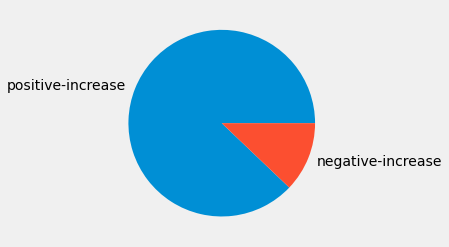

In [40]:
count1 = 0
count2 = 0
for i in range(len(df_compare['Date'])) :
    if(df_compare['Open'][i]<df_compare['Close'][i] and df_compare['Comp'][i]>0) :
        count1+=1
    if(df_compare['Open'][i]<df_compare['Close'][i] and df_compare['Comp'][i]<0) :
        count2+=1
pos_incr = (count1*100)/(count1+count2)    
neg_incr = (count2*100)/(count1+count2)  
arr=np.asarray([pos_incr,neg_incr], dtype=int)
mlpt.pie(arr,labels=['positive-increase','negative-increase'])
mlpt.plot()

In [41]:
df_=ccdata[['Date','Prices','Comp','Negative','Neutral','Positive']].copy()

In [42]:
df_

,Date,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,20.0,0.0000,0.0,1.000,0.000
1,2014-01-01,19.5,0.0000,0.0,1.000,0.000
2,2014-01-01,19.5,0.4019,0.0,0.690,0.310
3,2014-01-01,19.5,0.5095,0.0,0.798,0.202
4,2014-01-01,19.5,0.0000,0.0,1.000,0.000
...,...,...,...,...,...,...
17645,2016-03-31,27.0,0.6369,0.0,0.741,0.259
17646,2016-03-31,27.0,0.0000,0.0,1.000,0.000
17647,2016-03-31,27.0,0.0000,0.0,1.000,0.000
17648,2016-03-31,27.0,0.4767,0.0,0.860,0.140


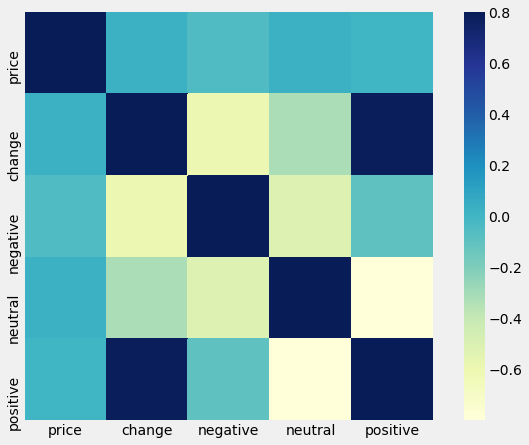

In [43]:
import seaborn as sns
# Correlation matrix
df_corr = pd.DataFrame(columns=['price','change','negative','neutral','positive'])
df_corr['price']= df_prices['Prices']
df_corr['change']= df_prices['Comp']
df_corr['negative']= df_prices['Negative']
df_corr['neutral']= df_prices['Neutral']
df_corr['positive']= df_prices['Positive']
# df_corr.reset_index(drop=True, inplace=True)
df_corr.to_csv('df_corr.csv', index=False)
data_corr= pd.read_csv('df_corr.csv')
corrmat = data_corr.corr()
fig = mlpt.figure(figsize = (10, 7))

sns.heatmap(corrmat, vmax = .8, square = True,cmap = 'YlGnBu')
mlpt.show()

In [45]:
df_ = df_.dropna()
print(len(df_['Prices']))

15563


,Date,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,20.0,0.0000,0.0,1.000,0.000
1,2014-01-01,19.5,0.0000,0.0,1.000,0.000
2,2014-01-01,19.5,0.4019,0.0,0.690,0.310
3,2014-01-01,19.5,0.5095,0.0,0.798,0.202
4,2014-01-01,19.5,0.0000,0.0,1.000,0.000
...,...,...,...,...,...,...
17645,2016-03-31,27.0,0.6369,0.0,0.741,0.259
17646,2016-03-31,27.0,0.0000,0.0,1.000,0.000
17647,2016-03-31,27.0,0.0000,0.0,1.000,0.000
17648,2016-03-31,27.0,0.4767,0.0,0.860,0.140


In [47]:
df1 = pd.DataFrame(columns=['Date','Prices','Comp','Negative','Neutral','Positive'])
df1

,Date,Prices,Comp,Negative,Neutral,Positive


In [66]:
df1['Date'] = df_['Date'].unique()
for i in range(len(df1['Date'])) :
    count=0
    price=0
    comp=0
    neg=0
    pos=0
    neut=0
    for j in range(len(df_)) :
        if(df_.iloc[j][0]==df1.loc[i][0]) :
            count+=1
            price+=df_.iloc[j][1]
            comp+=df_.iloc[j][2]
            neg+=df_.iloc[j][3]
            neut+=df_.iloc[j][4]
            pos+=df_.iloc[j][5]
    price=price/count
    comp=comp/count
    neg=neg/count
    pos=pos/count
    neut=neut/count
    df1.loc[i][1]=price
    df1.loc[i][2]=comp
    df1.loc[i][3]=neg
    df1.loc[i][4]=neut
    df1.loc[i][5]=pos
    print(i)
df1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,Date,Prices,Comp,Negative,Neutral,Positive
0,2013-12-31,20.0,0.000000,0.000000,1.000000,0.000000
1,2014-01-01,19.5,0.069583,0.052333,0.862333,0.085333
2,2014-01-02,19.0,0.099858,0.046417,0.885542,0.068000
3,2014-01-03,19.0,-0.011772,0.098111,0.806000,0.095889
4,2014-01-06,19.0,0.114861,0.056826,0.820000,0.123174
...,...,...,...,...,...,...
609,2016-03-24,26.0,0.018035,0.047615,0.894538,0.057808
610,2016-03-28,26.0,0.058890,0.056207,0.866552,0.077241
611,2016-03-29,26.0,-0.046177,0.071615,0.876410,0.051949
612,2016-03-30,27.0,0.089632,0.018464,0.915893,0.065679


In [69]:
df_=pd.read_csv('df1.csv')